In [1]:
## Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
## install joblib. This will be used to save your model. 
## Restart your kernel after installing 
#!pip install joblib

In [3]:
# Basic dependiecies
import pandas as pd

In [4]:
# sklearn imports
from sklearn.model_selection import train_test_split


# Read the CSV and Perform Basic Data Cleaning

In [5]:
exoplanet_df = pd.read_csv("../Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
exoplanet_df = exoplanet_df.dropna(axis='columns', how='all')
# Drop the null rows
exoplanet_df = exoplanet_df.dropna()

print(f'The total count of raw data given is: {len(exoplanet_df)}')
exoplanet_df.head()

The total count of raw data given is: 6991


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
# Check for direct correlations within columns to see if they need be dropped.
#exoplanet_df.corr()

In [7]:
# The several error 2 columns are dropped because of a driect correlation inorder to have a more accureate prediction
#a = exoplanet_df.drop(['koi_period_err2', 'koi_time0bk_err2'], axis= 1)

In [8]:
#exoplanet_df.info()

# Select your features (columns)

In [9]:
# Set features. This will also be used as your x values.
selected_features_df = exoplanet_df.drop(['koi_disposition'], axis=1)
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features_df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
X = selected_features_df
y = exoplanet_df['koi_disposition']
#.values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 40) (6991,)


In [11]:
# Create train and test values from our data set 
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [12]:
print(f'The length of the X train data is: {len(X_train)}')
X_train.head()

The length of the X train data is: 5243


,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,2.213000e-04,-2.213000e-04,132.035800,0.014300,-0.014300,...,-286,3.805,0.390,-0.130,2.730,0.535,-1.248,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,1.528000e-04,-1.528000e-04,131.968430,0.008230,-0.008230,...,-72,4.083,0.368,-0.092,1.453,0.218,-0.510,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,6.930000e-07,-6.930000e-07,137.137607,0.000053,-0.000053,...,-159,4.462,0.098,-0.182,0.897,0.238,-0.119,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,1.194000e-02,-1.194000e-02,136.373100,0.019000,-0.019000,...,-146,4.456,0.102,-0.361,0.867,0.448,-0.103,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,1.250000e-06,-1.250000e-06,133.850441,0.000978,-0.000978,...,-167,3.975,0.259,-0.111,1.851,0.383,-0.575,288.90253,44.632992,12.953


In [13]:
y_train

6080    FALSE POSITIVE
3001         CANDIDATE
570     FALSE POSITIVE
4897    FALSE POSITIVE
625     FALSE POSITIVE
             ...      
3315         CONFIRMED
2249         CONFIRMED
3751    FALSE POSITIVE
6016         CANDIDATE
5477         CANDIDATE
Name: koi_disposition, Length: 5243, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Y is categorical do not scale

In [16]:
X_train_scaled

array([[ 2.3636166 , -0.57155056, -0.50607237, ..., -0.60905163,
         0.17104541, -0.92407435],
       [-0.42308046, -0.57155056, -0.50607237, ...,  0.29580336,
        -0.74397694,  0.65138821],
       [-0.42308046,  1.7496265 , -0.50607237, ..., -1.96381125,
        -0.06023068, -0.05861626],
       ...,
       [-0.42308046,  1.7496265 , -0.50607237, ...,  0.77936028,
         0.27732824, -0.9920853 ],
       [-0.42308046, -0.57155056, -0.50607237, ...,  0.71398891,
        -0.40930913, -3.39488991],
       [-0.42308046, -0.57155056, -0.50607237, ...,  0.11014294,
        -0.6770074 ,  0.47575552]])

In [17]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [18]:
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [19]:
y_train_encoded

array([2, 0, 2, ..., 2, 0, 0])

# Train the Model



In [20]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_encoded)
    train_score = knn.score(X_train_scaled, y_train_encoded)
    test_score = knn.score(X_test_scaled, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.820
k: 3, Train/Test Score: 0.907/0.851
k: 5, Train/Test Score: 0.884/0.836
k: 7, Train/Test Score: 0.875/0.849
k: 9, Train/Test Score: 0.870/0.844
k: 11, Train/Test Score: 0.862/0.839
k: 13, Train/Test Score: 0.856/0.843
k: 15, Train/Test Score: 0.858/0.842
k: 17, Train/Test Score: 0.852/0.842
k: 19, Train/Test Score: 0.847/0.841
k: 21, Train/Test Score: 0.846/0.840
k: 23, Train/Test Score: 0.846/0.838
k: 25, Train/Test Score: 0.845/0.834
k: 27, Train/Test Score: 0.843/0.833
k: 29, Train/Test Score: 0.840/0.830
k: 31, Train/Test Score: 0.841/0.829
k: 33, Train/Test Score: 0.837/0.828
k: 35, Train/Test Score: 0.835/0.828
k: 37, Train/Test Score: 0.833/0.828
k: 39, Train/Test Score: 0.831/0.826
k: 41, Train/Test Score: 0.830/0.824
k: 43, Train/Test Score: 0.832/0.826
k: 45, Train/Test Score: 0.830/0.825
k: 47, Train/Test Score: 0.827/0.827
k: 49, Train/Test Score: 0.825/0.822


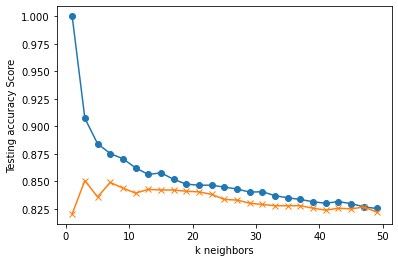

In [22]:
# Plot scores to give visual representation
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train_scaled, y_train_encoded)

print('k=19 Test Acc: %.3f' % knn_model.score(X_train_scaled, y_train_encoded))
print('k=19 Test Acc: %.3f' % knn_model.score(X_test_scaled, y_test_encoded))


k=19 Test Acc: 0.847
k=19 Test Acc: 0.841


In [24]:
# Get prediction value to test against classification report
predictions = knn_model.predict(X_test_scaled)

In [25]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, predictions, 
                            target_names = ["Confirmed", "False Positive", "Candidate"]))

                precision    recall  f1-score   support

     Confirmed       0.73      0.61      0.67       422
False Positive       0.69      0.81      0.75       450
     Candidate       0.98      0.97      0.97       876

      accuracy                           0.84      1748
     macro avg       0.80      0.80      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



# Save the Model

In [26]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = '../Saved_Models/KNN_model.sav'
joblib.dump(knn_model, filename)

['../Saved_Models/KNN_model.sav']